**QUESTION 01**

**1. Preprocess the data. Split it using a 70:10:20 ratio, which represents training:validation:testing.**



In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("read.csv")
df.head(20)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
5,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46
6,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71
7,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68
8,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50
9,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95


In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("read.csv")
df.head(20)

#now dropping the null values if present in the data

df1=df.dropna()

#now we get to know that there are no values

df1.isnull().sum()

# now in order to split to test train and validation sets first we need to convert into x and y numpy arrays

from sklearn.model_selection import train_test_split

# creating X and Y numpy arrays to pass into tts

Y=df1.Y1.to_numpy().astype('int')

X_data = df1.drop(columns=["Y1"])
X = X_data.to_numpy()

# splitting the data into test, train and validation

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30)
x_test, x_vali, y_test, y_vali = train_test_split(x_test,y_test,test_size = 0.33)

print("length of dataframe : ", len(df1))
print("length of training set : ", len(x_train))
print("length of validation set : ", len(x_vali))
print("length of test set: ", len(x_test))




length of dataframe :  768
length of training set :  537
length of validation set :  77
length of test set:  154


2.Write a function to train the data using a regression decision tree. The function varies hyper-parameters to find the tree that generalizes best (based on its performance on the validation set). So, you need to train on the 70% training data and check performance on the 10% validation data. Properly explain the thought process behind which hyper-parameters you vary and the expected effects in the report. Make plots of validation MSE to support your arguments.

3.Perform Hold-out cross validation, 5-fold cross-validation and repeated-5-fold validation
using the optimal hyper-parameters decided in the previous question. Finally, calculate the mean
squared error between the predicted and the ground-truth values in the test data for your best
model. Also, plot the decision tree created.

[(2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (7, 9), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8), (8, 9), (8, 10), (8, 11), (8, 12), (8, 13), (8, 14), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (11, 

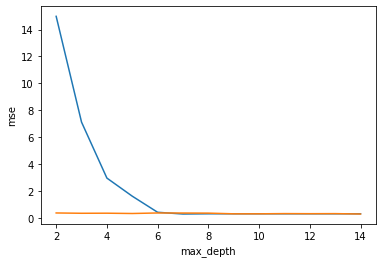

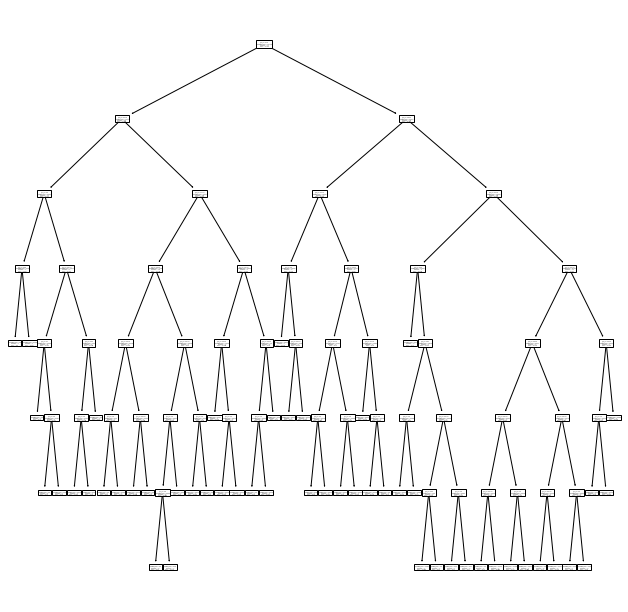

In [ ]:
import seaborn as sns

max_depth = [2,3,4,5,6,7,8,9,10,11,12,13,14]
min_sample_split = [2,3,4,5,6,7,8,9,10,11,12,13,14]

#finding all possible combinations in the data provided

all_permutations = [(i,j) for i in max_depth for j in min_sample_split]
print(all_permutations)


# now we find the best tuple of hyperparameters

# importing the regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

mse={}

for pair in all_permutations:
    regressor = DecisionTreeRegressor(max_depth=pair[0], min_samples_split=pair[1], random_state = 0)
    regressor.fit(x_train, y_train)
    y_predicted = regressor.predict(x_vali)
    mse[(pair[0],pair[1])] = mean_squared_error(y_predicted,y_vali)


mini_tuple= tuple()
mini=10000
for key,val in mse:
    if(val<mini):
      min_tuple = key
      mini = val


# best parameters and minimum mse

a = sorted(mse.items(), key = lambda kv:(kv[1], kv[0]))
print(a[0])

#data for plotting mse v/s max depth

mse_max_depth=[]
for i in range(2,15):
    regressor = DecisionTreeRegressor(max_depth=i, min_samples_split=a[0][0][1], random_state = 0)
    regressor.fit(x_train, y_train)
    y_predicted = regressor.predict(x_vali)
    mse_max_depth.append(mean_squared_error(y_predicted,y_vali))

print(mse_max_depth)
lst = [i for i in range(2,15)]

df = pd.DataFrame.from_dict({'max_depth': lst, 'mse': mse_max_depth})
sns.lineplot(x=df['max_depth'], y=df['mse'], data=df)

#data for plotting graph of mse v/s min sample split

mse_min_sample_split=[]
for i in range(2,15):
    regressor = DecisionTreeRegressor(max_depth=a[0][0][0], min_samples_split=i, random_state = 0)
    regressor.fit(x_train, y_train)
    y_predicted = regressor.predict(x_vali)
    mse_min_sample_split.append(mean_squared_error(y_predicted,y_vali))

print(mse_min_sample_split)
lst = [i for i in range(2,15)]

df = pd.DataFrame.from_dict({'min_sample_split': lst, 'mse': mse_min_sample_split})
sns.lineplot(x=df['min_sample_split'], y=df['mse'], data=df)


#k fold cross classification

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection

k = 5
kf = model_selection.KFold(n_splits=k, random_state=None)
model = regressor

#concatenating train and validation sets for applying k-fold model
x_new = np.concatenate([x_train, x_vali])
y_new = np.concatenate([y_train,y_vali])

result = cross_val_score(model , x_new, y_new, cv = kf)

print("each fold score : ", result)
print("avg score : ", result.mean())

# Now we are testing it on test set

from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=a[0][0][0],
                      min_samples_split=a[0][0][1])

regressor.fit(x_train, y_train)


y_predicted = regressor.predict(x_test)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_predicted,y_test)
print("mean squared error : ", mse)


#Now we are plotting the tree

from sklearn import tree
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize=(11,11))
tree.plot_tree(regressor)
plt.show()


Q2. For this task we will use only Petal length and Petal width attributes from the Iris dataset. Split the
dataset into training and test in the ratio 80:20.


In [ ]:
import pandas as pd
import numpy as np


df=pd.read_csv("Iris.csv")


df=df.drop(['Id'],axis=1)
df=df.drop(['SepalLengthCm'],axis=1)
df=df.drop(['SepalWidthCm'],axis=1)

df=df.dropna()


from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])


# now in order to split to test train and validation sets first we need to convert into x and y numpy arrays

from sklearn.model_selection import train_test_split

# creating X and Y numpy arrays to pass into tts

Y=df.Species.to_numpy().astype('int')

X_data = df.drop(columns=["Species"])
X = X_data.to_numpy()

# splitting the data into test and train

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.20)


print("length of dataframe : ", len(df))
print("length of training set : ", len(x_train))

print("length of test set: ", len(x_test))


df.head(80)

length of dataframe :  150
length of training set :  120
length of test set:  30


,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
75,4.4,1.4,1
76,4.8,1.4,1
77,5.0,1.7,1
78,4.5,1.5,1


1. Train a Decision Tree Classifier (max depth=2) on the pre-processed dataset. Plot the decision
boundaries of the tree as well as indicate the depth at which each split was made.[15 marks]

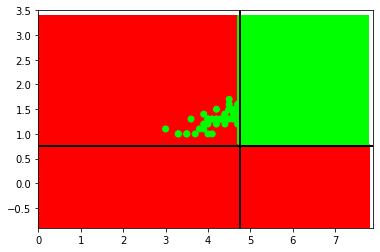

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# training a decision tree classifier with max depth=2

mytree = DecisionTreeClassifier(max_depth=2, random_state=1)
mytree.fit(x_train, y_train)

# creating a meshgrid to plot the decision boundaries

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1, y1 = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

mytree_2 = mytree.predict(np.c_[x1.ravel(), y1.ravel()])
mytree_2 = mytree_2.reshape(x1.shape)


# plotting the decision boundary of the tree

cmap = ListedColormap(['#ff0000', '#00ff00'])

plt.contourf(x1, y1, mytree_2, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap)

# We can add the split node points

num_nodes = mytree.tree_.node_count
children_right = mytree.tree_.children_right
children_left = mytree.tree_.children_left

threshold = mytree.tree_.threshold
feature = mytree.tree_.feature

for i in range(num_nodes):
    if children_left[i] != children_right[i]:
        if (feature[i] == 0):
            plt.plot([threshold[i], threshold[i]], [y_min, y_max], 'k-', linewidth=2)
        else:
            plt.plot([x_min, x_max], [threshold[i], threshold[i]], 'k-', linewidth=2)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()






2. Remove the widest Iris-Versicolor from the iris training set (the one with petals 4.8 cm long and 1.8 cm wide) and train a new Decision Tree. Plot the Decision boundary for this case.[10
marks]

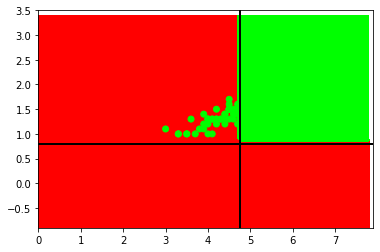

In [ ]:
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

X1 = np.delete(X, 71, axis=0)
Y1 = np.delete(Y, 71, axis=0)

# splitting the data into test and train

x_train1, x_test, y_train1, y_test = train_test_split(X1,Y1,test_size=0.20)


from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# training a decision tree classifier with max depth=2

mytree = DecisionTreeClassifier(max_depth=2, random_state=1)
mytree.fit(x_train1, y_train1)

# creating a meshgrid to plot the decision boundaries

x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
x2, y2 = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

mytree_2 = mytree.predict(np.c_[x2.ravel(), y2.ravel()])
mytree_2 = mytree_2.reshape(x2.shape)


# plotting the decision boundary of the tree

cmap = ListedColormap(['#ff0000', '#00ff00'])

plt.contourf(x2, y2, mytree_2, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap)



plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


3. Train a Decision Tree Classifier with (max-depth = None) on the pre-processed dataset. Plot the Decision boundary for the same. Compare and analyse the results with those in part 1.[5marks]

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt




mytree = DecisionTreeClassifier(max_depth=None, random_state=1)
mytree.fit(x_train, y_train)

# creating a meshgrid to plot the decision boundaries

x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
x2, y2 = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

mytree_2 = mytree.predict(np.c_[x2.ravel(), y2.ravel()])
mytree_2 = mytree_2.reshape(x2.shape)


# plotting the decision boundary of the tree

cmap = ListedColormap(['#ff0000', '#00ff00'])

plt.contourf(x2, y2, mytree_2, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap)



plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()







ValueError: ignored

4. Create a random dataset having 2 attributes(X1 and X2), and 2 classes (y=0 and y=1) .X1,X2 are
randomly sampled from the range (0,5). y=0 when X1<2.5, and y=1 when X1>2The dataset should have 100 data points for both the classes. Train a decision tree for such a
dataset(max-depth=2). Plot the obtained decision boundaries.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#now we have to create random numpy datasets with restrictions of y on the entries
#the range defined is between 0 to 5 and number of points are 100



#first we create datapoints for y=0

x10=np.random.uniform(0,2.5,50)

y0=np.zeros((100,1))

#now we create datapoints for y=1

x11=np.random.uniform(2.5,5,50)
y1=np.ones((100,1))

X1 = np.concatenate((x10,x11))
X2=np.random.uniform(0,5,100)
y = np.concatenate((y0, y1))

#now inorder to add the datapoints to single array we use the hstack function

X1=np.reshape(X1,(100,1))
X2=np.reshape(X2,(100,1))

df1 = pd.DataFrame(X1, columns = ['X1'])
df2 = pd.DataFrame(X2, columns = ['X2'])
df3 = pd.DataFrame(Y, columns = ['Y'])

merged_df=pd.concat([df1,df2,df3],axis=0)
merged_df=merged_df.dropna()

from sklearn.model_selection import train_test_split

# creating X and Y numpy arrays to pass into tts

Y1=merged_df.Y.to_numpy().astype('int')

X_data = merged_df.drop(columns=["Y"])
X = X_data.to_numpy()

# splitting the data into test and train

x_train, x_test, y_train, y_test = train_test_split(X,Y1,test_size=0.30)


from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# training a decision tree classifier with max depth=2

mytree = DecisionTreeClassifier(max_depth=2, random_state=1)
mytree.fit(x_train, y_train)

# creating a meshgrid to plot the decision boundaries

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1, y1 = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

mytree_2 = mytree.predict(np.c_[x1.ravel(), y1.ravel()])
mytree_2 = mytree_2.reshape(x1.shape)


# plotting the decision boundary of the tree

cmap = ListedColormap(['#ff0000', '#00ff00'])

plt.contourf(x1, y1, mytree_2, cmap=cmap)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap)


plt.show()









ValueError: ignored

Regression [ 20 marks]



1. Train two decision tree models, one with max_depth = 2 and another with max_depth = 3. Plot
the regression predictions at each depth for each max_depth( for e.g., at depths 0,1 for
max_depth = 2) using a line plot. Next, make a scatter plot of the data points on the same plots to give a detailed analysis of what you see in the report along with the plots. [10 marks]

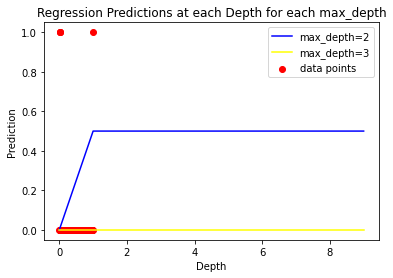

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

df=pd.read_csv('task.csv')
df.dropna()

from sklearn.model_selection import train_test_split

# creating X and Y numpy arrays to pass into tts

Y1=df.Y.to_numpy().astype('int')

X_data = df.drop(columns=["Y"])
X1 = X_data.to_numpy()

# splitting the data into test and train

x_train, x_test, y_train, y_test = train_test_split(X1,Y1,test_size=0.20)

#now we will train the decision models using the maxdepth=2 and maxdepth=3

reg_md2 = DecisionTreeRegressor(max_depth=2)
reg_md3 = DecisionTreeRegressor(max_depth=3)

reg_md2.fit(x_train, y_train)
reg_md3.fit(x_train, y_train)

#now we are asked to see predictions at each max_depth
pred_2=[]
pred_3=[]

depth=np.arange(0,10)



pred_2 = [reg_md2.predict([[d]]) for d in depth]
pred_3 = [reg_md3.predict([[d]]) for d in depth]

# Plotting the line plots for regression predictions

plt.plot(depth, pred_2, color="blue", label="max_depth=2")
plt.plot(depth, pred_3, color="yellow", label="max_depth=3")
plt.scatter(X1, Y1, color="red", label="data points")
plt.xlabel("Depth")
plt.ylabel("Prediction")
plt.title("Regression Predictions at each Depth for each max_depth")

plt.legend()
plt.show()





2. Plot the data points and make a line graph to show the decision tree fits on the dataset in two
cases: min_samples_leaf = 0 and min_samples_leaf = 10. Analyze the two plots and explain
your findings in the report. [10 marks]

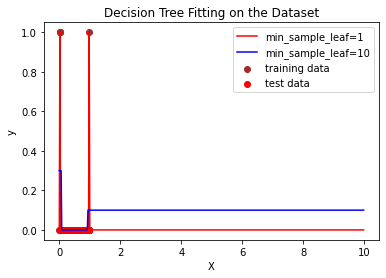

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

df=pd.read_csv('task.csv')
df.dropna()

from sklearn.model_selection import train_test_split

# creating X and Y numpy arrays to pass into tts

Y1=df.Y.to_numpy().astype('int')

X_data = df.drop(columns=["Y"])
X1 = X_data.to_numpy()

# splitting the data into test and train

x_train, x_test, y_train, y_test = train_test_split(X1,Y1,test_size=0.20)

#now we will train the decision models using the min_samples_leaf = 0 and min_samples_leaf = 10

reg_ml0 = DecisionTreeRegressor(min_samples_leaf =1)
reg_ml1 = DecisionTreeRegressor(min_samples_leaf =10)

reg_ml0.fit(x_train, y_train)
reg_ml1.fit(x_train, y_train)

#we will define over here X_plotting which is an numpy array with entries between 0 to 10 and gap of 0.02

X_plotting = np.arange(0.0, 10.0, 0.02)[:, np.newaxis]

y_plot_0 = reg_ml0.predict(X_plotting)
y_plot_10 = reg_ml1.predict(X_plotting)

plt.plot(X_plotting, y_plot_0, color="red", label="min_sample_leaf=1")
plt.plot(X_plotting, y_plot_10, color="blue", label="min_sample_leaf=10")

#scatter plots shown below
plt.scatter(x_train, y_train, color="brown", label="training data")
plt.scatter(x_test, y_test, color="red", label="test data")

plt.xlabel("X")
plt.ylabel("y")

plt.title("Decision Tree Fitting on the Dataset")

plt.legend()
plt.show()






Question 3. [70 marks]
This question is designed to help you understand the working of a decision tree (DT). You will find
a dataset, here, containing information used to classify penguins into 3 species. You need to
implement a classification decision tree (DT) from scratch [you are not permitted to use any
3rd-party library’s function for the classifier e.g. scikit. You may, however, use built-in functions
for auxiliary tasks like train/test split, etc.].
● With respect to the cost function to be used to find splits, everywhere in this question, you
have to implement one of the following based on your roll number:


○ Odd roll numbers - Gini index
○ Even roll numbers - entropy

1. Perform pre-processing and visualization of the dataset. Perform categorical encoding
wherever applicable and split the data into train and test sets - [7 marks]

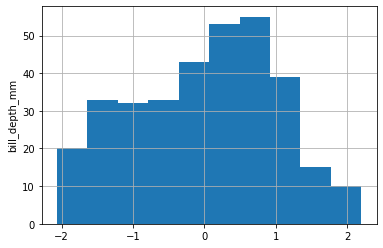

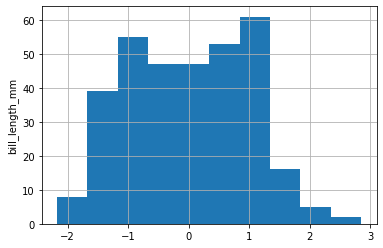

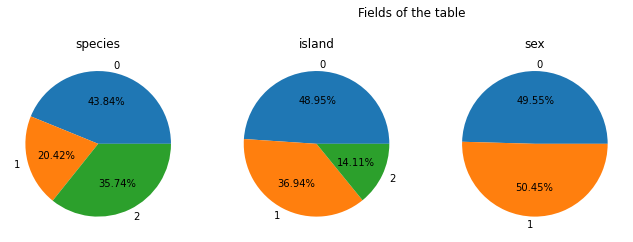

,rowid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,1,0,2,-0.894695,0.779559,-1.424608,-0.567621,1
1,2,0,2,-0.821552,0.119404,-1.067867,-0.505525,0
2,3,0,2,-0.675264,0.424091,-0.425733,-1.188572,0
4,5,0,2,-1.333559,1.084246,-0.568429,-0.940192,0
5,6,0,2,-0.858123,1.744400,-0.782474,-0.691811,1
6,7,0,2,-0.931267,0.322529,-1.424608,-0.722858,0
7,8,0,2,-0.876409,1.236589,-0.425733,0.581140,1
12,13,0,2,-0.528976,0.220967,-1.353259,-1.250667,0
13,14,0,2,-0.986125,2.049087,-0.711125,-0.505525,1
14,15,0,2,-1.717565,1.998306,-0.211688,0.239616,1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df=pd.read_csv("penguins.csv")


#performing the preprocessing

df=df.dropna()
df=df.drop(columns=["year"],axis=1)



#encoding few columns like species island and sex

from sklearn.preprocessing import StandardScaler,LabelEncoder

le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['species']=le.fit_transform(df['species'])
df['island']=le.fit_transform(df['island'])
df.head(50)

#now we should standardize the data which are the big values

def normalize_feature(list_columns):
  for i in list_columns:
    df[i]=((df[i]-df[i].mean())/df[i].std())
  return df1


list_features = ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm'	,'body_mass_g']
df1 = normalize_feature(list_features)
df.head(50)

#now doing the visualisation part

df['bill_depth_mm'].hist()
plt.ylabel('bill_depth_mm')
plt.show()

df['bill_length_mm'].hist()
plt.ylabel('bill_length_mm')
plt.show()

i = 1
columns=['species','island','sex']

plot = plt.figure()
plot.set_figwidth(15)

for j in columns:
  database = list(set(df[j]))
  count = []

  for k in database:
    num = list(df[j]).count(k)

    count.append(num)

  plt.subplot(1,4,i)

  plt.pie(count, labels=database, autopct="%1.2f%%")
  plt.title(j)
  i=i+1
plot.suptitle("Fields of the table")
plt.show()

df.head(50)

2. Implement the cost function as per your roll num.

In [ ]:
#according to my roll number which is B21CS093 therefore I implemented gini index

import numpy as np

def gini_index(self, y):

        class_labels = np.unique(y)
        gini = 0
        for cls in class_labels:
            temp = len(y[y == cls]) / len(y)
            gini = temp**2 + gini
        ans = 1 - gini
        return ans

